In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.simulation_options import simulateSinglePorosity


In [2]:
mrt = 25.00
pe  = 3.00
frac_retard = 1.0
inj_durs = np.cumsum(np.array([1.5]))


time_points = np.linspace(0.00001, 60, 50)

bkg_values  = [0, 2.3, 4.6, 6.9]
simulated_conc_values = []



for b in tqdm(bkg_values, desc='Simulating ...'):
    inj_concs = np.array([7.0, b], dtype=float)

    concs_single = simulateSinglePorosity(
            mrt,
            pe,
            frac_retard,
            time_points,
            b,
            inj_concs,
            inj_durs
    )

    simulated_conc_values.append(concs_single)

Simulating ...: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


In [3]:
# Optional save data to excel file for visualization
df = {f"Cb = {bkg_values[i]} mg/L": simulated_conc_values[i] - bkg_values[i] for i in range(len(simulated_conc_values))}
df['Time (hr)'] = time_points
df = pd.DataFrame(df)
df.to_csv("../outputs/Figure_4.csv")

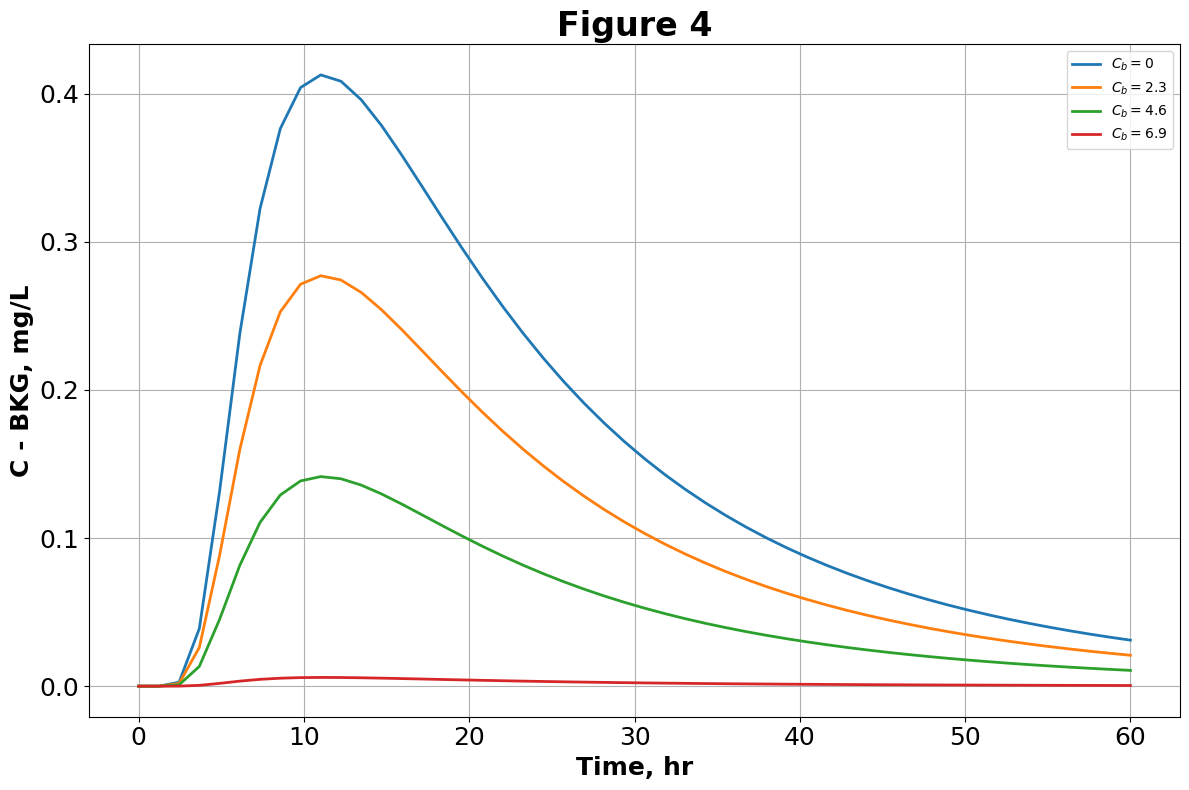

In [4]:

plt.figure(figsize=(12, 8))

for i, s in enumerate(simulated_conc_values):
    # Plot concentration curve
    plt.plot(time_points, s - bkg_values[i], label=fr"$C_b = {bkg_values[i]}$", lw=2)

    # Plot horizontal dashed line at y = b_values[i]
    # plt.axhline(y=b_values[i], color=plt.gca().lines[-1].get_color(),
    #             linestyle="--", linewidth=1)

    # # Add text with subscript at x=120
    # plt.text(115, b_values[i],
    #          fr"$C_{{b}} = {b_values[i]}$ mg/L",
    #          color=plt.gca().lines[-1].get_color(),
    #          fontsize=15, va="bottom")

# Titles and labels
plt.title("Figure 4", fontsize=24, fontweight="bold")
plt.xlabel("Time, hr", fontsize=18, fontweight='bold')
plt.ylabel("C - BKG, mg/L", fontsize=18, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.tight_layout()
plt.legend()
# os.makedirs('Figures', exist_ok=True)
# plt.savefig('Figures/Figure_4.jpg')
plt.show()
